In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se cargan las funciones desde la otra notebook
%run "funciones.ipynb"

In [2]:
data = pd.read_csv('../data/Health Screening Data.csv', index_col= None)

**Introducción al dataframe**

In [3]:
data.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0,Normal,40-60
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.9,Obese,40-60
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.5,Normal,40-60
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.7,Over Weight,40-60
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.0,Normal,40-60


In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'AgeinYr', 'BMI', 'BMICat', 'AgeGroup'],
      dtype='object')

In [5]:
data.shape

(69960, 18)

In [6]:
data = data.drop(columns=['Unnamed: 0', 'id',])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69960 entries, 0 to 69959
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69960 non-null  int64  
 1   gender       69960 non-null  int64  
 2   height       69960 non-null  int64  
 3   weight       69960 non-null  float64
 4   ap_hi        69960 non-null  int64  
 5   ap_lo        69960 non-null  int64  
 6   cholesterol  69960 non-null  int64  
 7   gluc         69960 non-null  int64  
 8   smoke        69960 non-null  int64  
 9   alco         69960 non-null  int64  
 10  active       69960 non-null  int64  
 11  cardio       69960 non-null  int64  
 12  AgeinYr      69960 non-null  int64  
 13  BMI          69960 non-null  float64
 14  BMICat       69960 non-null  object 
 15  AgeGroup     69960 non-null  object 
dtypes: float64(2), int64(12), object(2)
memory usage: 8.5+ MB


**Exploramos Feature "age"**

In [8]:
data["age"].head()

0    18393
1    20228
2    18857
3    17623
4    17474
Name: age, dtype: int64

 Feature **"age"** divide edad en días, no pareciera muy útil para el proyecto, se propone dropear.

In [9]:
data = data.drop(columns=['age'])

**Exploramos Feature "AgeGroup"**

In [10]:
data["AgeGroup"].value_counts()

40-60    56712
>60       9844
20-40     3404
Name: AgeGroup, dtype: int64

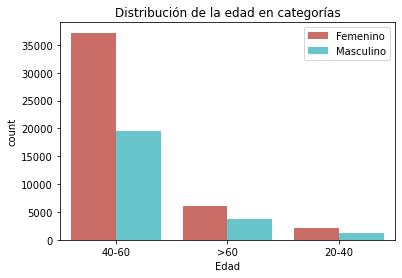

In [11]:
sns.countplot(x = "AgeGroup", data = data, hue = "gender", palette = "hls")

plt.legend(["Femenino", "Masculino"])
plt.xlabel("Edad")
plt.title("Distribución de la edad en categorías")

plt.show()

Feature **"AgeGroup"** divide la edad en 3 categorias muy amplias y desbalanceadas. Se propone dropear y utilizar otras categorías a partir de Feature **"AgeinYR"**

**Exploramos Feature "AgeinYr"** 

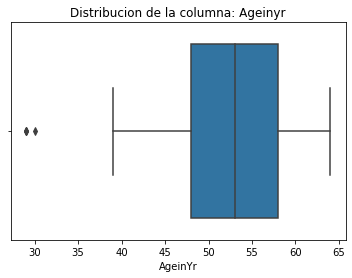

Descripcion de la columna Ageinyr 
 count    69960.000000
mean        52.841109
std          6.766655
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: AgeinYr, dtype: float64


In [12]:
exploracion(data, "AgeinYr")

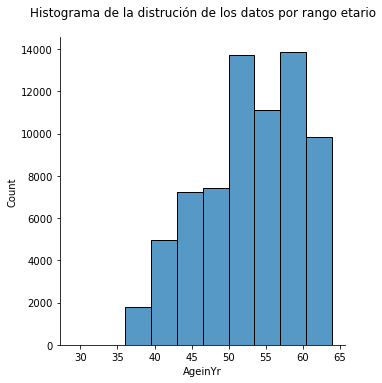

In [15]:
sns.displot(data.AgeinYr, bins = 10, palette = 'Set2')
plt.title("Histograma de la distrución de los datos por rango etario\n")
plt.show()

Se propone conservar feature **"AgeinYR"** pero también discretizar en categorias

In [16]:
#Discretizacion de variables Age

bins = [0, 30, 40, 50, 60, 70]
AgeCat = pd.cut(data.AgeinYr, bins, right = False)

data['AgeCat'] = AgeCat

In [17]:
data['AgeCat'].value_counts().sort_values()

[0, 30)         3
[30, 40)     1780
[60, 70)    13043
[40, 50)    19611
[50, 60)    35523
Name: AgeCat, dtype: int64

**Exploramos Feature "height"** 

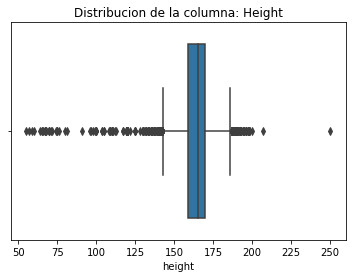

Descripcion de la columna Height 
 count    69960.000000
mean       164.359105
std          8.210541
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64


In [18]:
exploracion(data, "height")

In [19]:
eliminar_outliers(data, "height", 150, 200)

Shape del dataframe inicial: (69960, 16)
Shape del dataframe luego de eliminar outliers: (68421, 16)


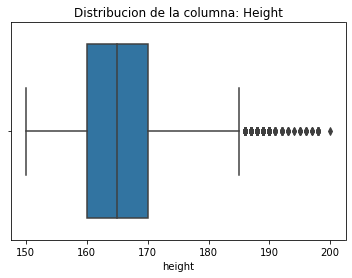

Descripcion de la columna Height 
 count    68421.000000
mean       164.824294
std          7.457162
min        150.000000
25%        160.000000
50%        165.000000
75%        170.000000
max        200.000000
Name: height, dtype: float64


In [20]:
exploracion(data, "height")

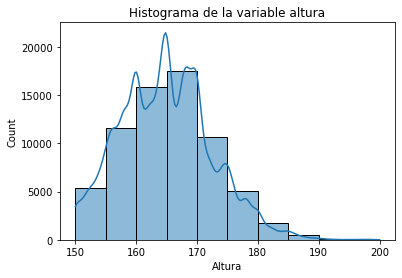

In [21]:
sns.histplot(data.height, kde = True, bins = 10)
plt.xlabel("Altura")
plt.title("Histograma de la variable altura")
plt.show()

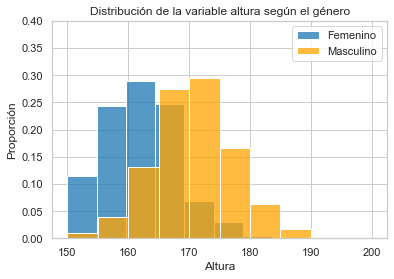

In [23]:
sns.set_style("whitegrid")
sns.set_context("notebook")

data_male = data[data.gender == 1]
data_male_height= data_male.height


sns.histplot(data_male_height,  kde=False, bins = 10, label='male', stat = "probability")

data_fem = data[data.gender == 2]
data_fem_height = data_fem.height
sns.histplot(data_fem_height,  kde=False, label='female', bins = 10, color = 'orange', stat = "probability")

plt.xlabel("height")

# Add title

plt.xlabel("Altura")
plt.ylabel("Proporción")
plt.title("Distribución de la variable altura según el género")
plt.legend(["Femenino", "Masculino"])
plt.ylim((0, 0.4))

plt.show()

El **histograma** sirve para identificar que **1 = female y 2 = male en feature 'gender'**

In [24]:
data.gender.value_counts()
proporcion_gender = (data.gender.value_counts() / data.shape[0]) * 100  #por height deduzco que '1' = female, '2' = male
print("Proporción de género femenino: {:.2f}%".format(proporcion_gender[1]))
print("Proporción de género masculino: {:.2f}%".format(proporcion_gender[2]))

Proporción de género femenino: 64.37%
Proporción de género masculino: 35.63%


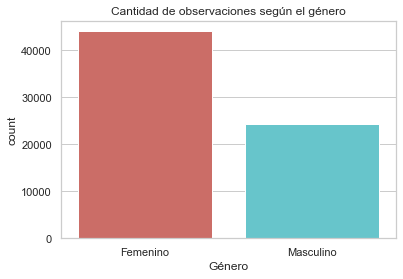

In [31]:
ax= sns.countplot(x="gender", data=data, palette="hls")
ax.set_xticklabels(["Femenino", "Masculino"])
plt.title("Cantidad de observaciones según el género")
plt.xlabel("Género")

plt.show()

**Exploramos Feature "weight"** 

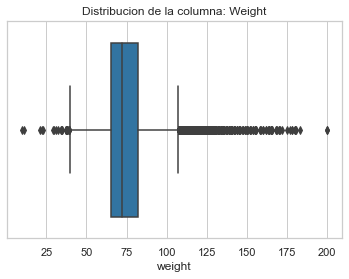

Descripcion de la columna Weight 
 count    68421.000000
mean        74.403725
std         14.286223
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


In [32]:
exploracion(data, "weight")

Se considera que las personas con un peso menor a 50 como el resultado de [altura - 100]

In [33]:
lower_range = 50
upper_range = 200

In [34]:
data['new_weight'] = data.apply(lambda x: x['height'] - 100 if x['weight'] < 50 else x['weight'], axis = 1)

In [35]:
data['new_weight'].describe()

count    68421.000000
mean        74.537792
std         14.073542
min         50.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: new_weight, dtype: float64

In [36]:
data['weight'] = data['new_weight']

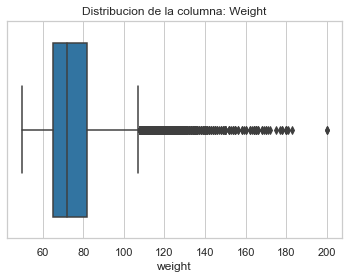

Descripcion de la columna Weight 
 count    68421.000000
mean        74.537792
std         14.073542
min         50.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


In [37]:
exploracion(data, "weight")

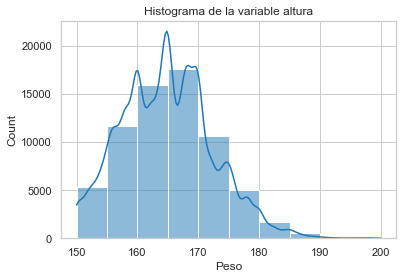

In [38]:
sns.histplot(data.height, kde = True, bins = 10)
plt.title("Histograma de la variable altura")
plt.xlabel("Peso")

plt.show()

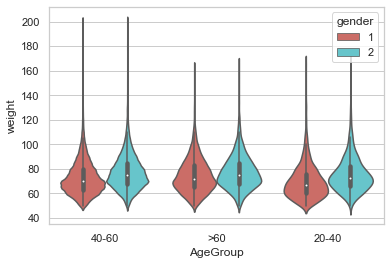

In [39]:
sns.violinplot(x=data.AgeGroup, y=data.weight, hue="gender", data=data, palette="hls")
plt.show()

**Exploramos Feature "BMI"** 

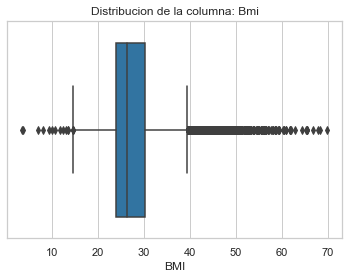

Descripcion de la columna Bmi 
 count    68421.000000
mean        27.414887
std          5.172745
min          3.500000
25%         23.900000
50%         26.300000
75%         30.100000
max         69.800000
Name: BMI, dtype: float64


In [40]:
exploracion(data, "BMI")

Al inspeccionar la feature **"BMI"** con valores bajos, se observa BMIs mal calculados

In [41]:
bmi_menor_15 = data[data["BMI"] < 15]
bmi_menor_15[["height", "weight", "BMI"]].head()

,height,weight,BMI
5359,167,67.0,14.7
9482,172,72.0,13.5
10441,162,62.0,14.5
12914,174,74.0,14.9
16218,196,56.0,14.6


Fórmula BMI: peso (kg) / estatura (m<sup>2</sup>) [explicación](https://www.cdc.gov/healthyweight/spanish/assessing/bmi/adult_bmi/index.html#:~:text=%C2%BFC%C3%B3mo%20se%20calcula%20el%20IMC%3F,-El%20IMC%20se&text=Con%20el%20sistema%20m%C3%A9trico%2C%20la,obtener%20la%20estatura%20en%20metros)

A su vez, considerando que había muchos errores en la feature **"BMI"**, se recalcula la misma.

In [42]:
group_bins = [0, 18.5, 24.9, 29.9, 60]

group_labels = ['Bajo peso', 'Peso normal', 'Sobrepeso', 'Obesidad']

In [43]:
BMI_categorico(data, "BMI", "BMICat", "weight", "height", group_bins, group_labels)

Valores únicos por categoría antes del tratamiento de los datos:
 Over Weight     25129
Normal          24866
Obese           17818
Under Weight      608
Name: BMICat, dtype: int64
Valores únicos por categoría después del tratamiento de los datos:
 Sobrepeso      25542
Peso normal    24766
Obesidad       17833
Bajo peso        261
Name: BMICat, dtype: int64


,BMI,BMICat
0,21.97,Peso normal
1,34.93,Obesidad
2,23.51,Peso normal
3,28.71,Sobrepeso
4,23.01,Peso normal


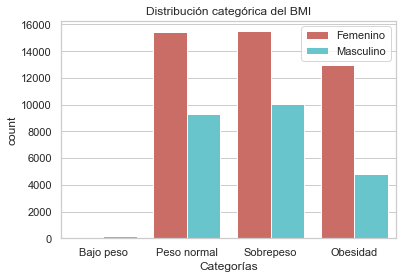

In [44]:
ax = sns.countplot(x="BMICat", data=data, hue= 'gender', palette="hls")
plt.legend(["Femenino", "Masculino"])
plt.title("Distribución categórica del BMI")
plt.xlabel("Categorías")

plt.show()

**Exploramos Features "ap_hi", "ap_lo", "cholesterol", "gluc"** 

In [45]:
columns = ['ap_hi', 'ap_lo', 'cholesterol', 'gluc']
data[columns].isnull().sum()

ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
dtype: int64

In [46]:
data[columns].describe()

,ap_hi,ap_lo,cholesterol,gluc
count,68421.000000,68421.000000,68421.00000,68421.000000
mean,126.639321,96.654770,1.36461,1.226232
std,18.141221,189.809431,0.67877,0.572067
min,-150.000000,-70.000000,1.00000,1.000000
25%,120.000000,80.000000,1.00000,1.000000
50%,120.000000,80.000000,1.00000,1.000000
75%,140.000000,90.000000,2.00000,1.000000
max,240.000000,11000.000000,3.00000,3.000000


**Explorando tensión arterial (TA):**

**Presión sistólica**

In [47]:
print(f'Valores de TAS menores de 90 mmHg: {data.ap_hi[(data.ap_hi<90)].count()}')
print(f'Valores de TAS mayores de 240 mmHg: {data.ap_hi[(data.ap_hi>240)].count()}')

Valores de TAS menores de 90 mmHg: 310
Valores de TAS mayores de 240 mmHg: 0


In [48]:
# Analisis del los valores menores a 90 mmHg
data.ap_hi[data.ap_hi<90].unique()

array([  80,   14,   70,   11,   12,   10,   16, -100,   85,    7,   15,
         17,    1,   13,   60, -115,   20, -140, -120, -150,   24],
      dtype=int64)

**Presión diastólica**

In [49]:
print(f'valores con TAD menores de 40 mmHg: {data.ap_lo[data.ap_lo<40].count()}')
print(f'valores con TAD mayores de 120 mmHg: {data.ap_lo[data.ap_lo>120].count()}')

valores con TAD menores de 40 mmHg: 50
valores con TAD mayores de 120 mmHg: 1030


Analisis del los valores menores de 40 y mayores de 120 mmHg

In [50]:
data.ap_lo[(data.ap_lo<40)|(data.ap_lo>120)].unique()

array([ 1100,  1000,   800,    30,  1033,   150,  1001,  1200, 10000,
        8044,   140,   125,   170,   160,   130,  9100,    10,   902,
        1008,  2088,    20,   802,  8000,     8,  1022,   850,   708,
        9011,  1011,     0,  1007,  1177,  7100,   709,  8500,  1110,
        8099,  1088,   126,  1077,  1120,     7,  1125,   180,   121,
        8100,   710,  5700,  8079,  1111,  1003,     6,  1900,   809,
         801,  1002,   182,   810,     9,  7099, 11000,  9800,  8200,
        1139,   820,  1400,   190,   900,   122,  6800,   135,   700,
          15,  1101,   910,  1140,  1211,   -70,  8077,   901,   880,
         870,   585,   602], dtype=int64)

Corrección TAS y TAD (se consideran diferentes errores de carga)

In [51]:
data['TAS'] = data.ap_hi.apply(correct_TA, args=((90,240),0))
data['TAD'] = data.ap_lo.apply(correct_TA, args=((40,120),0))

Se eliminan las columnas ap_hi y ap_lo

In [52]:
data.drop(columns=['ap_hi','ap_lo'], inplace=True)

In [53]:
print(f'cantidad de valores en TAS sin poder corregir: {data.TAS[data.TAS == 999].count()}')
print(f'cantidad de valores en TAD sin poder corregir: {data.TAD[data.TAD == 999].count()}')

cantidad de valores en TAS sin poder corregir: 129
cantidad de valores en TAD sin poder corregir: 167


Se imputan los datos faltantes de TAD o TAS utilizando un delta de 40 mmHg entre uno y otro

In [54]:
data = data.apply(complete_TA, axis=1)

In [55]:
print(f'hay {data.TAS[(data.TAS <= data.TAD)].count()} casos en que la TAS es <= TAD')

hay 8 casos en que la TAS es <= TAD


Se corrigen las incoherencias entre TAS y TAD (considerando la TAS como valor de referencia)

In [56]:
data = data.apply(control_TA, axis=1)

print(f'hay {data.TAS[(data.TAS <= data.TAD)].count()} casos en que la TAS es <= TAD')

hay 0 casos en que la TAS es <= TAD


In [57]:
data.isnull().sum()

gender          0
height          0
weight          0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
AgeinYr         0
BMI             0
BMICat         19
AgeGroup        0
AgeCat          0
new_weight      0
TAS            16
TAD            16
dtype: int64

Se eliminan valores nulos

In [58]:
data = data.dropna()

**Presión de pulso   [explicación](https://en.wikipedia.org/wiki/Pulse_pressure#Relationship_to_heart_disease)**

Se genera la variable PP (presión de pulso)

In [59]:
data['PP'] = data.TAS - data.TAD
print(data.PP.describe())

count    68386.000000
mean        45.466711
std         11.715282
min          5.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        140.000000
Name: PP, dtype: float64


In [60]:
data.to_csv('../data/data_limpia.csv', index_label=False)